# Create dataset

Amazon review data from [here](https://nijianmo.github.io/amazon/index.html). We'll use a subset subset 

In [1]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen
import seaborn as sns
import numpy as np

In [3]:
!wget https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/All_Beauty_5.json.gz --no-check-certificate

--2023-10-26 05:53:01--  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/All_Beauty_5.json.gz
Resolving jmcauley.ucsd.edu (jmcauley.ucsd.edu)... 137.110.160.73
Connecting to jmcauley.ucsd.edu (jmcauley.ucsd.edu)|137.110.160.73|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 633507 (619K) [application/x-gzip]
Saving to: ‘All_Beauty_5.json.gz’

All_Beauty_5.json.g 100%[===================>] 618.66K   675KB/s    in 0.9s    

2023-10-26 05:53:03 (675 KB/s) - ‘All_Beauty_5.json.gz’ saved [633507/633507]



In [2]:
data = []
with gzip.open('All_Beauty_5.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
print(len(data))
print(data[0])

5269
{'overall': 5.0, 'verified': True, 'reviewTime': '09 1, 2016', 'reviewerID': 'A3CIUOJXQ5VDQ2', 'asin': 'B0000530HU', 'style': {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice Blue'}, 'reviewerName': 'Shelly F', 'reviewText': 'As advertised. Reasonably priced', 'summary': 'Five Stars', 'unixReviewTime': 1472688000}


In [3]:
df = pd.DataFrame.from_dict(data)
df.shape

(5269, 12)

In [4]:
df.isna().sum()

overall              0
verified             0
reviewTime           0
reviewerID           0
asin                 0
style              645
reviewerName         0
reviewText           5
summary              5
unixReviewTime       0
vote              4717
image             5171
dtype: int64

In [5]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"09 1, 2016",A3CIUOJXQ5VDQ2,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Shelly F,As advertised. Reasonably priced,Five Stars,1472688000,NaN,NaN
1,5.0,True,"11 14, 2013",A3H7T87S984REU,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",houserules18,Like the oder and the feel when I put it on my...,Good for the face,1384387200,NaN,NaN
2,1.0,True,"08 18, 2013",A3J034YH7UG4KT,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Adam,I bought this to smell nice after I shave. Wh...,Smells awful,1376784000,NaN,NaN
3,5.0,False,"05 3, 2011",A2UEO5XR3598GI,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Rich K,HEY!! I am an Aqua Velva Man and absolutely lo...,Truth is There IS Nothing Like an AQUA VELVA MAN.,1304380800,25,NaN
4,5.0,True,"05 6, 2011",A3SFRT223XXWF7,B00006L9LC,{'Size:': ' 200ml/6.7oz'},C. C. Christian,If you ever want to feel pampered by a shampoo...,Bvlgari Shampoo,1304640000,3,NaN


In [10]:
reviews_df = df.dropna(subset=['reviewText'])
reviews_df.shape

(5264, 12)

In [11]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5264 entries, 0 to 5268
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         5264 non-null   float64
 1   verified        5264 non-null   bool   
 2   reviewTime      5264 non-null   object 
 3   reviewerID      5264 non-null   object 
 4   asin            5264 non-null   object 
 5   style           4619 non-null   object 
 6   reviewerName    5264 non-null   object 
 7   reviewText      5264 non-null   object 
 8   summary         5259 non-null   object 
 9   unixReviewTime  5264 non-null   int64  
 10  vote            552 non-null    object 
 11  image           98 non-null     object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 498.6+ KB


# Exploratory analysis

<Axes: xlabel='overall', ylabel='count'>

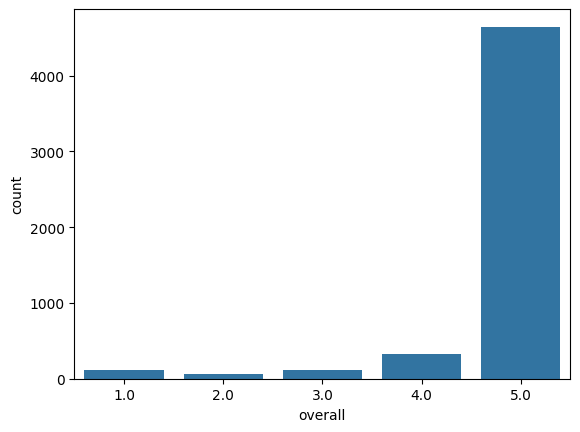

In [9]:
sns.countplot(data=df1, x='overall')

The data is rather unbalanced with lots of rating 5. We'll try resampling to overcome this issue

In [14]:
one = reviews_df[reviews_df['overall']==1.0].sample(n=100,replace=True)
two = reviews_df[reviews_df['overall']==2.0].sample(n=100,replace=True)
three = reviews_df[reviews_df['overall']==3.0].sample(n=100)
four = reviews_df[reviews_df['overall']==4.0].sample(n=100)
five = reviews_df[reviews_df['overall']==5.0].sample(n=100)

In [15]:
balanced_reviews = pd.concat([one, two, three, four, five])

In [16]:
balanced_reviews.to_csv("./small_corpus.csv", index=False)